# mse會嚴重受到極端值影響,因此去除和卡額度100萬以上的資料,約8筆

In [1]:
#複製 https://github.com/agu3rra/NeuralNetwork-RegressionExample/blob/master/Tutorial.ipynb
from keras.datasets import boston_housing
from keras.datasets import reuters
import numpy as np
import os
import tensorflow as tf
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt
import time
import pandas as pd
import random
from sklearn.utils import shuffle
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from keras import regularizers
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [2]:
df = pd.read_excel(r'C:\Users\Big data\Desktop\class\funcardproject\補值data\補值_rf_Y為數值_去除100萬以上.xls',encoding='utf-16')
df = df.loc[:, ["age","serveTime","credLimit","Loan","SalPerY","holdCard","Career"]] 
df[:20]

,age,serveTime,credLimit,Loan,SalPerY,holdCard,Career
0,33.137854,42.395304,500000,0.000000,1.645888e+06,0,2
1,40.000000,120.000000,500000,2.000000,2.500000e+06,0,4
2,35.000000,108.000000,500000,0.000000,5.000000e+06,0,2
3,36.000000,84.000000,500000,0.000000,1.713098e+06,1,2
4,29.000000,30.000000,500000,2.000000,5.000000e+05,1,2
5,30.000000,38.687619,500000,2.000000,1.818209e+06,1,2
6,34.333205,48.000000,500000,2.000000,1.700000e+06,1,2
7,30.000000,30.000000,500000,2.000000,5.000000e+05,1,2
8,23.000000,11.490740,500000,0.000000,1.263163e+06,1,2
9,54.000000,10.000000,500000,2.000000,1.966329e+06,1,2


In [3]:
#先打散資料(三次)
for i in range(3):
    df = shuffle(df)
#再切成訓練與測試
train_data, test_data, train_targets, test_targets = train_test_split(df.loc[:, ["age","serveTime","Loan","SalPerY","holdCard","Career"]] , df.loc[:, ["credLimit"]] , test_size=0.3, random_state=42)
print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(1417, 6)
(608, 6)
(1417, 1)
(608, 1)


In [4]:
train_data, test_data, train_targets, test_targets = train_test_split(df.loc[:, ["age","serveTime","Loan","SalPerY","holdCard","Career"]] , df.loc[:, ["credLimit"]] , test_size=0.3, random_state=42)

In [5]:
#正規化
mean = train_data.mean(axis=0)
train_data -=mean
std = train_data.std(axis=0)
train_data/=std
test_data-=mean
test_data/=std

In [6]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(8, activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(1))#非0~1的預測,故不使用啟動函數轉為01
    model.compile(optimizer='rmsprop',loss='mae',metrics=['mae'])
    return model
              

In [7]:
k=4
num_val_samples = len(train_data)//k
num_epochs = 200
all_scores=[]
num_val_samples

354

In [8]:
tStart = time.time()
all_mae_histories=[]
for i in range(k):
    print('processing fold #',i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples ]
    val_targets = train_targets[i * num_val_samples:(i+1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples ],
                                        train_data[(i+1)*num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples ],
                                        train_targets[(i+1)*num_val_samples:]],axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets),epochs = num_epochs,batch_size=8)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)
tEnd = time.time()
print ("It cost %f sec" % (tEnd - tStart))#會自動做近位
print (tEnd - tStart)#原型長這樣

processing fold # 0
Train on 1063 samples, validate on 354 samples
Epoch 1/200
1063/1063 [==============================] - 0s 313us/step - loss: 135251.5627 - mae: 135251.5312 - val_loss: 136906.9431 - val_mae: 136906.9375
Epoch 2/200
1063/1063 [==============================] - 0s 109us/step - loss: 135248.1961 - mae: 135248.1719 - val_loss: 136902.5448 - val_mae: 136902.5312
Epoch 3/200
1063/1063 [==============================] - 0s 105us/step - loss: 135241.9736 - mae: 135241.9844 - val_loss: 136894.9953 - val_mae: 136895.0156
Epoch 4/200
1063/1063 [==============================] - 0s 103us/step - loss: 135231.9424 - mae: 135231.9219 - val_loss: 136883.2721 - val_mae: 136883.2812
Epoch 5/200
1063/1063 [==============================] - 0s 102us/step - loss: 135216.7923 - mae: 135216.7969 - val_loss: 136865.8746 - val_mae: 136865.8906
Epoch 6/200
1063/1063 [==============================] - 0s 101us/step - loss: 135194.8725 - mae: 135194.8750 - val_loss: 136841.8825 - val_mae: 136

1063/1063 [==============================] - 0s 114us/step - loss: 112656.0275 - mae: 112656.0234 - val_loss: 114611.4653 - val_mae: 114611.4688
Epoch 53/200
1063/1063 [==============================] - 0s 101us/step - loss: 111646.3401 - mae: 111646.3203 - val_loss: 113629.4580 - val_mae: 113629.4688
Epoch 54/200
1063/1063 [==============================] - 0s 101us/step - loss: 110604.5657 - mae: 110604.5469 - val_loss: 112603.1398 - val_mae: 112603.1328
Epoch 55/200
1063/1063 [==============================] - 0s 98us/step - loss: 109516.1014 - mae: 109516.1094 - val_loss: 111565.8064 - val_mae: 111565.7969
Epoch 56/200
1063/1063 [==============================] - 0s 100us/step - loss: 108421.2605 - mae: 108421.2656 - val_loss: 110533.1003 - val_mae: 110533.1094
Epoch 57/200
1063/1063 [==============================] - 0s 98us/step - loss: 107312.4721 - mae: 107312.4844 - val_loss: 109492.0660 - val_mae: 109492.0781
Epoch 58/200
1063/1063 [==============================] - 0s 100us/

Epoch 105/200
1063/1063 [==============================] - 0s 104us/step - loss: 64785.3825 - mae: 64785.3828 - val_loss: 70993.0883 - val_mae: 70993.0859
Epoch 106/200
1063/1063 [==============================] - 0s 101us/step - loss: 64570.9495 - mae: 64570.9414 - val_loss: 70766.2648 - val_mae: 70766.2656
Epoch 107/200
1063/1063 [==============================] - 0s 99us/step - loss: 64377.1570 - mae: 64377.1680 - val_loss: 70543.3158 - val_mae: 70543.3125
Epoch 108/200
1063/1063 [==============================] - 0s 101us/step - loss: 64191.6986 - mae: 64191.6992 - val_loss: 70333.8564 - val_mae: 70333.8594
Epoch 109/200
1063/1063 [==============================] - 0s 100us/step - loss: 64025.5193 - mae: 64025.5195 - val_loss: 70135.4195 - val_mae: 70135.4141
Epoch 110/200
1063/1063 [==============================] - 0s 100us/step - loss: 63866.1968 - mae: 63866.1992 - val_loss: 69944.2000 - val_mae: 69944.1953
Epoch 111/200
1063/1063 [==============================] - 0s 99us/step

Epoch 158/200
1063/1063 [==============================] - 0s 102us/step - loss: 60051.0155 - mae: 60051.0156 - val_loss: 66166.1534 - val_mae: 66166.1562
Epoch 159/200
1063/1063 [==============================] - 0s 116us/step - loss: 60016.9269 - mae: 60016.9219 - val_loss: 66139.5279 - val_mae: 66139.5391
Epoch 160/200
1063/1063 [==============================] - 0s 98us/step - loss: 59982.3245 - mae: 59982.3359 - val_loss: 66109.4122 - val_mae: 66109.4219
Epoch 161/200
1063/1063 [==============================] - 0s 101us/step - loss: 59950.3085 - mae: 59950.3047 - val_loss: 66079.8908 - val_mae: 66079.8906
Epoch 162/200
1063/1063 [==============================] - 0s 100us/step - loss: 59915.5731 - mae: 59915.5859 - val_loss: 66042.7384 - val_mae: 66042.7422
Epoch 163/200
1063/1063 [==============================] - 0s 99us/step - loss: 59882.9659 - mae: 59882.9688 - val_loss: 66012.2678 - val_mae: 66012.2578
Epoch 164/200
1063/1063 [==============================] - 0s 97us/step 

1063/1063 [==============================] - 0s 100us/step - loss: 135567.5732 - mae: 135567.5781 - val_loss: 135332.7946 - val_mae: 135332.7656
Epoch 11/200
1063/1063 [==============================] - 0s 97us/step - loss: 135520.3038 - mae: 135520.2812 - val_loss: 135279.6926 - val_mae: 135279.7031
Epoch 12/200
1063/1063 [==============================] - 0s 97us/step - loss: 135463.9086 - mae: 135463.9219 - val_loss: 135216.9444 - val_mae: 135216.9219
Epoch 13/200
1063/1063 [==============================] - 0s 98us/step - loss: 135397.8726 - mae: 135397.8750 - val_loss: 135143.5554 - val_mae: 135143.5625
Epoch 14/200
1063/1063 [==============================] - 0s 99us/step - loss: 135320.6966 - mae: 135320.7031 - val_loss: 135058.1262 - val_mae: 135058.1406
Epoch 15/200
1063/1063 [==============================] - 0s 96us/step - loss: 135232.0734 - mae: 135232.0938 - val_loss: 134961.1844 - val_mae: 134961.1875
Epoch 16/200
1063/1063 [==============================] - 0s 98us/step

1063/1063 [==============================] - 0s 102us/step - loss: 110829.5082 - mae: 110829.5000 - val_loss: 110111.6869 - val_mae: 110111.6719
Epoch 63/200
1063/1063 [==============================] - 0s 99us/step - loss: 109918.9780 - mae: 109918.9844 - val_loss: 109197.6801 - val_mae: 109197.6953
Epoch 64/200
1063/1063 [==============================] - 0s 101us/step - loss: 108997.9603 - mae: 108997.9688 - val_loss: 108256.4503 - val_mae: 108256.4531
Epoch 65/200
1063/1063 [==============================] - 0s 105us/step - loss: 108071.4792 - mae: 108071.4844 - val_loss: 107292.0168 - val_mae: 107292.0000
Epoch 66/200
1063/1063 [==============================] - 0s 104us/step - loss: 107111.7009 - mae: 107111.7109 - val_loss: 106316.1820 - val_mae: 106316.1797
Epoch 67/200
1063/1063 [==============================] - 0s 100us/step - loss: 106140.8620 - mae: 106140.8516 - val_loss: 105321.5549 - val_mae: 105321.5469
Epoch 68/200
1063/1063 [==============================] - 0s 97us/

Epoch 115/200
1063/1063 [==============================] - 0s 99us/step - loss: 66084.9893 - mae: 66084.9922 - val_loss: 66321.6547 - val_mae: 66321.6641
Epoch 116/200
1063/1063 [==============================] - 0s 108us/step - loss: 65737.5569 - mae: 65737.5781 - val_loss: 66010.2289 - val_mae: 66010.2266
Epoch 117/200
1063/1063 [==============================] - 0s 104us/step - loss: 65420.0708 - mae: 65420.0859 - val_loss: 65725.6119 - val_mae: 65725.6016
Epoch 118/200
1063/1063 [==============================] - 0s 111us/step - loss: 65099.3573 - mae: 65099.3711 - val_loss: 65450.3989 - val_mae: 65450.3906
Epoch 119/200
1063/1063 [==============================] - 0s 95us/step - loss: 64820.5814 - mae: 64820.5742 - val_loss: 65219.0960 - val_mae: 65219.0859
Epoch 120/200
1063/1063 [==============================] - 0s 101us/step - loss: 64581.2140 - mae: 64581.2070 - val_loss: 65030.7545 - val_mae: 65030.7383
Epoch 121/200
1063/1063 [==============================] - 0s 99us/step 

Epoch 168/200
1063/1063 [==============================] - 0s 97us/step - loss: 60558.8441 - mae: 60558.8242 - val_loss: 61741.6651 - val_mae: 61741.6602
Epoch 169/200
1063/1063 [==============================] - 0s 99us/step - loss: 60537.2119 - mae: 60537.2188 - val_loss: 61719.4233 - val_mae: 61719.4062
Epoch 170/200
1063/1063 [==============================] - 0s 97us/step - loss: 60512.6975 - mae: 60512.6914 - val_loss: 61692.4602 - val_mae: 61692.4531
Epoch 171/200
1063/1063 [==============================] - 0s 98us/step - loss: 60488.7341 - mae: 60488.7344 - val_loss: 61667.4586 - val_mae: 61667.4688
Epoch 172/200
1063/1063 [==============================] - 0s 98us/step - loss: 60465.5232 - mae: 60465.5117 - val_loss: 61647.8780 - val_mae: 61647.8750
Epoch 173/200
1063/1063 [==============================] - 0s 97us/step - loss: 60442.2854 - mae: 60442.2891 - val_loss: 61629.4133 - val_mae: 61629.4180
Epoch 174/200
1063/1063 [==============================] - 0s 98us/step - lo

1063/1063 [==============================] - 0s 104us/step - loss: 133638.6790 - mae: 133638.6875 - val_loss: 136295.0583 - val_mae: 136295.0625
Epoch 21/200
1063/1063 [==============================] - 0s 101us/step - loss: 133433.5138 - mae: 133433.5312 - val_loss: 136088.1007 - val_mae: 136088.1094
Epoch 22/200
1063/1063 [==============================] - 0s 102us/step - loss: 133211.7324 - mae: 133211.7188 - val_loss: 135864.1484 - val_mae: 135864.1406
Epoch 23/200
1063/1063 [==============================] - 0s 107us/step - loss: 132967.3252 - mae: 132967.3750 - val_loss: 135618.2391 - val_mae: 135618.2188
Epoch 24/200
1063/1063 [==============================] - 0s 102us/step - loss: 132704.6926 - mae: 132704.6875 - val_loss: 135354.4714 - val_mae: 135354.4688
Epoch 25/200
1063/1063 [==============================] - 0s 102us/step - loss: 132412.7605 - mae: 132412.7969 - val_loss: 135066.2254 - val_mae: 135066.2188
Epoch 26/200
1063/1063 [==============================] - 0s 105u

Epoch 72/200
1063/1063 [==============================] - 0s 101us/step - loss: 102408.1212 - mae: 102408.0938 - val_loss: 105606.8984 - val_mae: 105606.8906
Epoch 73/200
1063/1063 [==============================] - 0s 100us/step - loss: 101595.6732 - mae: 101595.6484 - val_loss: 104845.5563 - val_mae: 104845.5703
Epoch 74/200
1063/1063 [==============================] - 0s 100us/step - loss: 100790.3796 - mae: 100790.3828 - val_loss: 104039.0955 - val_mae: 104039.1094
Epoch 75/200
1063/1063 [==============================] - 0s 102us/step - loss: 99962.7648 - mae: 99962.7812 - val_loss: 103241.1232 - val_mae: 103241.1328
Epoch 76/200
1063/1063 [==============================] - 0s 102us/step - loss: 99144.7195 - mae: 99144.7266 - val_loss: 102426.5785 - val_mae: 102426.5781
Epoch 77/200
1063/1063 [==============================] - 0s 100us/step - loss: 98305.8809 - mae: 98305.8516 - val_loss: 101592.0985 - val_mae: 101592.1016
Epoch 78/200
1063/1063 [==============================] - 

1063/1063 [==============================] - 0s 99us/step - loss: 67000.9936 - mae: 67000.9922 - val_loss: 67719.2255 - val_mae: 67719.2109
Epoch 126/200
1063/1063 [==============================] - 0s 98us/step - loss: 66695.7969 - mae: 66695.8047 - val_loss: 67350.1211 - val_mae: 67350.1172
Epoch 127/200
1063/1063 [==============================] - 0s 98us/step - loss: 66428.2257 - mae: 66428.2188 - val_loss: 67027.9829 - val_mae: 67027.9844
Epoch 128/200
1063/1063 [==============================] - 0s 98us/step - loss: 66164.6727 - mae: 66164.6484 - val_loss: 66714.2903 - val_mae: 66714.2812
Epoch 129/200
1063/1063 [==============================] - 0s 98us/step - loss: 65912.7671 - mae: 65912.7578 - val_loss: 66405.0143 - val_mae: 66405.0234
Epoch 130/200
1063/1063 [==============================] - 0s 100us/step - loss: 65694.4863 - mae: 65694.4766 - val_loss: 66136.6069 - val_mae: 66136.6016
Epoch 131/200
1063/1063 [==============================] - 0s 99us/step - loss: 65493.460

1063/1063 [==============================] - 0s 99us/step - loss: 60950.9471 - mae: 60950.9492 - val_loss: 60849.0824 - val_mae: 60849.0664
Epoch 179/200
1063/1063 [==============================] - 0s 98us/step - loss: 60914.2424 - mae: 60914.2383 - val_loss: 60840.7359 - val_mae: 60840.7344
Epoch 180/200
1063/1063 [==============================] - 0s 99us/step - loss: 60876.1496 - mae: 60876.1523 - val_loss: 60838.3055 - val_mae: 60838.3047
Epoch 181/200
1063/1063 [==============================] - 0s 98us/step - loss: 60838.1028 - mae: 60838.0898 - val_loss: 60833.8443 - val_mae: 60833.8438
Epoch 182/200
1063/1063 [==============================] - 0s 101us/step - loss: 60801.0986 - mae: 60801.1055 - val_loss: 60834.2267 - val_mae: 60834.2188
Epoch 183/200
1063/1063 [==============================] - 0s 102us/step - loss: 60767.1007 - mae: 60767.1055 - val_loss: 60827.9390 - val_mae: 60827.9219
Epoch 184/200
1063/1063 [==============================] - 0s 100us/step - loss: 60732.5

1063/1063 [==============================] - 0s 101us/step - loss: 132533.8962 - mae: 132533.9375 - val_loss: 128031.6035 - val_mae: 128031.6016
Epoch 31/200
1063/1063 [==============================] - 0s 105us/step - loss: 132108.2974 - mae: 132108.2969 - val_loss: 127589.7565 - val_mae: 127589.7656
Epoch 32/200
1063/1063 [==============================] - 0s 102us/step - loss: 131655.9837 - mae: 131655.9844 - val_loss: 127114.0674 - val_mae: 127114.0781
Epoch 33/200
1063/1063 [==============================] - 0s 102us/step - loss: 131170.7316 - mae: 131170.7500 - val_loss: 126612.2523 - val_mae: 126612.2578
Epoch 34/200
1063/1063 [==============================] - 0s 103us/step - loss: 130659.2165 - mae: 130659.1875 - val_loss: 126078.9485 - val_mae: 126078.9609
Epoch 35/200
1063/1063 [==============================] - 0s 101us/step - loss: 130119.3145 - mae: 130119.2812 - val_loss: 125519.1925 - val_mae: 125519.1953
Epoch 36/200
1063/1063 [==============================] - 0s 101u

1063/1063 [==============================] - 0s 100us/step - loss: 88217.7868 - mae: 88217.7812 - val_loss: 82752.9907 - val_mae: 82753.0078
Epoch 83/200
1063/1063 [==============================] - 0s 101us/step - loss: 87335.3178 - mae: 87335.3281 - val_loss: 81834.0648 - val_mae: 81834.0703
Epoch 84/200
1063/1063 [==============================] - 0s 101us/step - loss: 86447.3432 - mae: 86447.3438 - val_loss: 80908.3232 - val_mae: 80908.3359
Epoch 85/200
1063/1063 [==============================] - 0s 100us/step - loss: 85593.3312 - mae: 85593.3359 - val_loss: 80006.2850 - val_mae: 80006.2891
Epoch 86/200
1063/1063 [==============================] - 0s 101us/step - loss: 84724.0921 - mae: 84724.0938 - val_loss: 79110.0791 - val_mae: 79110.0781
Epoch 87/200
1063/1063 [==============================] - 0s 101us/step - loss: 83892.0469 - mae: 83892.0391 - val_loss: 78224.0411 - val_mae: 78224.0391
Epoch 88/200
1063/1063 [==============================] - 0s 103us/step - loss: 83058.632

1063/1063 [==============================] - 0s 101us/step - loss: 67031.7278 - mae: 67031.7266 - val_loss: 60319.2105 - val_mae: 60319.2031
Epoch 136/200
1063/1063 [==============================] - 0s 100us/step - loss: 66913.9034 - mae: 66913.9062 - val_loss: 60212.9071 - val_mae: 60212.9102
Epoch 137/200
1063/1063 [==============================] - 0s 101us/step - loss: 66789.4841 - mae: 66789.5000 - val_loss: 60116.4946 - val_mae: 60116.4805
Epoch 138/200
1063/1063 [==============================] - 0s 100us/step - loss: 66672.6095 - mae: 66672.6484 - val_loss: 60011.6645 - val_mae: 60011.6602
Epoch 139/200
1063/1063 [==============================] - 0s 101us/step - loss: 66554.8411 - mae: 66554.8281 - val_loss: 59911.7812 - val_mae: 59911.7812
Epoch 140/200
1063/1063 [==============================] - 0s 101us/step - loss: 66451.3830 - mae: 66451.3828 - val_loss: 59820.0085 - val_mae: 59820.0156
Epoch 141/200
1063/1063 [==============================] - 0s 101us/step - loss: 663

1063/1063 [==============================] - 0s 98us/step - loss: 63720.7301 - mae: 63720.7305 - val_loss: 57132.8283 - val_mae: 57132.8320
Epoch 189/200
1063/1063 [==============================] - 0s 99us/step - loss: 63689.1800 - mae: 63689.1602 - val_loss: 57106.8498 - val_mae: 57106.8438
Epoch 190/200
1063/1063 [==============================] - 0s 104us/step - loss: 63657.5213 - mae: 63657.5352 - val_loss: 57079.8020 - val_mae: 57079.8086
Epoch 191/200
1063/1063 [==============================] - 0s 106us/step - loss: 63625.5948 - mae: 63625.5898 - val_loss: 57052.8649 - val_mae: 57052.8594
Epoch 192/200
1063/1063 [==============================] - 0s 104us/step - loss: 63592.7774 - mae: 63592.7617 - val_loss: 57029.3478 - val_mae: 57029.3398
Epoch 193/200
1063/1063 [==============================] - 0s 105us/step - loss: 63562.5011 - mae: 63562.4922 - val_loss: 57002.1663 - val_mae: 57002.1680
Epoch 194/200
1063/1063 [==============================] - 0s 102us/step - loss: 63530

In [9]:
# 看看字典裡有哪些欄位
mae_history = history.history
mae_history

{'val_loss': [132475.39954096044,
  132472.03142655367,
  132465.86317090396,
  132456.12641242938,
  132441.89512711865,
  132422.28672316385,
  132396.34533898305,
  132363.2219279661,
  132322.30914548022,
  132272.11122881356,
  132211.7168079096,
  132141.31673728814,
  132059.26324152542,
  131965.24064265538,
  131856.73675847458,
  131733.46875,
  131595.30402542374,
  131442.35893361582,
  131271.3672316384,
  131082.59622175142,
  130875.32344632769,
  130648.54802259887,
  130400.91772598871,
  130132.27692443503,
  129842.77427612995,
  129531.05014124294,
  129193.35125353107,
  128832.51606638418,
  128445.87923728813,
  128031.60346045198,
  127589.75653248587,
  127114.06744350282,
  126612.25229519774,
  126078.94853460453,
  125519.19253177966,
  124923.35328389831,
  124296.97148658193,
  123636.37164548022,
  122944.92902542373,
  122219.53698799435,
  121460.36158192091,
  120677.28486935029,
  119911.08483403955,
  119146.07609463276,
  118397.71257062147,
  11765

In [10]:
#建構平均k折驗證分數的歷史
average_mae_history=[
    np.mean([x[i] for x in all_mae_histories])for i in range(num_epochs)
]

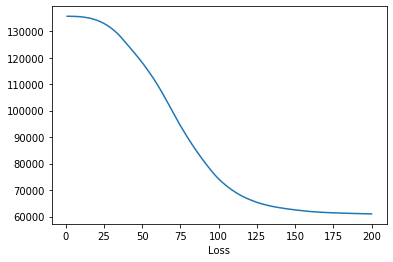

In [11]:
#mae 繪圖
plt.plot(range(1, len(average_mae_history)+1),average_mae_history)
plt.xlabel('Epohs')
plt.xlabel('Loss')
plt.show()
#接著選取MAE最小的周期再作訓練

In [12]:
average_mae_history

[135647.28125,
 135643.5234375,
 135637.08203125,
 135627.01171875,
 135612.328125,
 135592.0625,
 135565.296875,
 135531.21875,
 135489.00390625,
 135437.4375,
 135375.8359375,
 135303.47265625,
 135219.0859375,
 135121.8671875,
 135010.98046875,
 134884.8828125,
 134743.515625,
 134585.47265625,
 134410.22265625,
 134216.5859375,
 134003.330078125,
 133771.36328125,
 133516.880859375,
 133240.91015625,
 132941.40234375,
 132618.8359375,
 132270.7578125,
 131897.6171875,
 131498.544921875,
 131070.185546875,
 130613.0078125,
 130124.37109375,
 129608.130859375,
 129059.54296875,
 128476.583984375,
 127862.3125,
 127215.3359375,
 126542.59375,
 125857.26171875,
 125174.130859375,
 124496.140625,
 123820.9375,
 123143.890625,
 122461.98046875,
 121776.642578125,
 121086.201171875,
 120384.359375,
 119669.490234375,
 118943.759765625,
 118198.345703125,
 117432.9921875,
 116643.404296875,
 115844.21484375,
 115029.83984375,
 114200.2578125,
 113365.54296875,
 112514.388671875,
 111625.68

In [13]:
model = build_model()
model.fit(train_data, train_targets,epochs=60, batch_size=8,)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

Epoch 1/60
1417/1417 [==============================] - 0s 139us/step - loss: 135666.6109 - mae: 135666.6562
Epoch 2/60
1417/1417 [==============================] - 0s 80us/step - loss: 135664.6347 - mae: 135664.5938
Epoch 3/60
1417/1417 [==============================] - 0s 78us/step - loss: 135661.1252 - mae: 135661.1250
Epoch 4/60
1417/1417 [==============================] - 0s 80us/step - loss: 135654.8468 - mae: 135654.8594
Epoch 5/60
1417/1417 [==============================] - 0s 82us/step - loss: 135644.9069 - mae: 135644.9062
Epoch 6/60
1417/1417 [==============================] - 0s 81us/step - loss: 135630.1918 - mae: 135630.1719
Epoch 7/60
1417/1417 [==============================] - 0s 79us/step - loss: 135609.7972 - mae: 135609.7969
Epoch 8/60
1417/1417 [==============================] - 0s 81us/step - loss: 135582.3983 - mae: 135582.4062
Epoch 9/60
1417/1417 [==============================] - 0s 81us/step - loss: 135546.9842 - mae: 135546.9844
Epoch 10/60
1417/1417 [====

In [14]:
test_mae_score

103239.484375

In [15]:
df["credLimit"]

369     200000
991     100000
1497     50000
292     250000
1586     50000
387     200000
1905     20000
301     248000
1796     20000
219     300000
655     150000
116     360000
244     280000
1477     60000
1187     80000
1990     20000
1133     95000
481     190000
263     260000
902     120000
840     120000
1671     50000
782     132000
508     180000
869     120000
44      500000
412     200000
833     125000
1401     60000
10      500000
         ...  
1206     80000
433     200000
1895     20000
439     200000
35      500000
1257     80000
817     130000
458     200000
448     200000
445     200000
4       500000
363     200000
341     210000
503     180000
726     150000
1341     70000
251     280000
1625     50000
385     200000
1096    100000
1085    100000
1585     50000
221     300000
1763     30000
891     120000
132     350000
383     200000
1577     50000
1567     50000
326     220000
Name: credLimit, Length: 2025, dtype: int64

# 看起來成效不大

# 測試 小綠同學

In [16]:
小綠 = pd.DataFrame(columns=["age","serveTime","Loan","SalPerY","holdCard","Career"])
小綠.loc[0]=8,120,4,600000,1,1
小綠.loc[1]=280,120,3,600000000,1,1
小綠.loc[2]=28,12,0,87,2,0
小綠.loc[3]=28,12,0,8700,2,0
小綠

,age,serveTime,Loan,SalPerY,holdCard,Career
0,8,120,4,600000,1,1
1,28,12,0,600000,0,0
2,28,12,0,87,2,0
